In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/data.csv", error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
df.shape


(669640, 2)

In [5]:
df['strength'].unique()

array([1, 2, 0], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [7]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [8]:
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [9]:
df.dropna(inplace=True)

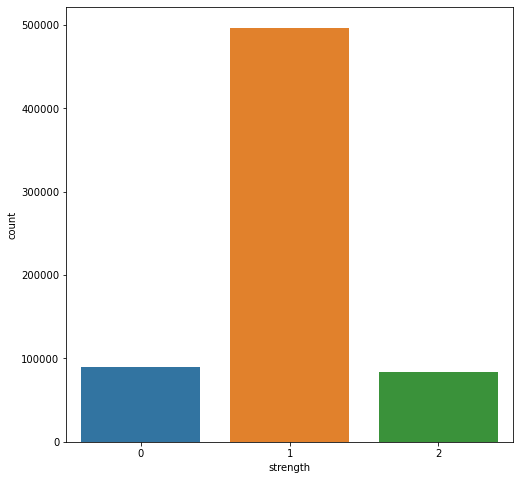

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(df.strength)

In [11]:
passwords = np.array(df)

In [12]:
passwords

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
X = [password[0] for password in passwords]
y = [password[1] for password in passwords]

In [15]:
def conv_chars(word):
    chars = []
    for letter in word:
        chars.append(letter)
    return chars

In [16]:
vectorizer = TfidfVectorizer(tokenizer=conv_chars)

In [17]:
X_new = vectorizer.fit_transform(X)

In [18]:
X_new.shape

(669639, 153)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=10)

In [34]:
from sklearn.linear_model import LogisticRegression


In [42]:
model = LogisticRegression(solver='saga')

In [47]:
lgr = model.fit(x_train, y_train)

In [48]:
lgr.score(x_test, y_test)

0.8182963980646317

In [52]:
from xgboost import XGBClassifier 

In [55]:
xgb =  XGBClassifier(n_jobs = -1).fit(x_train, y_train)

[20:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
xgb.score(x_test,y_test)

0.9806642375007467

In [58]:
import pickle

In [59]:
with open('xgbclassifier.pkl', 'wb+') as f:
    pickle.dump(xgb,f)
    f.close()

In [60]:
with open('vectorizer.pkl', 'wb+') as f:
    pickle.dump(vectorizer,f)
    f.close()